In [16]:
from numberplate_extractor.plate_extractor import PlateExtractor
from code.numberplate_extractor.character_extractor import CharacterExtraction
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
plate_extractor = PlateExtractor()
character_extractor = CharacterExtraction()

/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


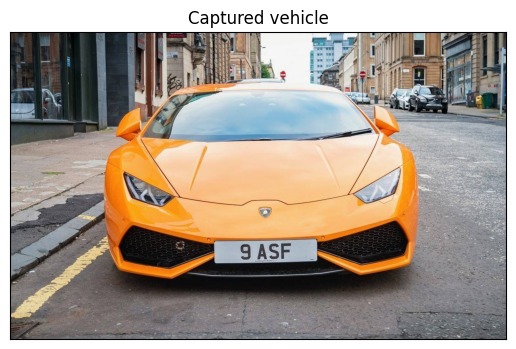

In [18]:
# Read image in
image = Image.open('example_data/test_3.jpeg')

plt.imshow(image)
plt.title("Captured vehicle")
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
# Get bounding box coordinates of plate
numberplate_prediction = plate_extractor.make_prediction(image)
xmin, ymin, xmax, ymax = plate_extractor.get_bounding_box(numberplate_prediction)

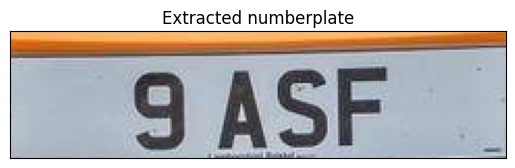

In [20]:
# Crop the numberplate from the original image
numberplate = plate_extractor.get_extracted_numberplate_as_np(image, xmin, ymin, xmax, ymax)

plt.imshow(numberplate)
plt.title("Extracted numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
numberplate_string = character_extractor.segment_characters(numberplate)

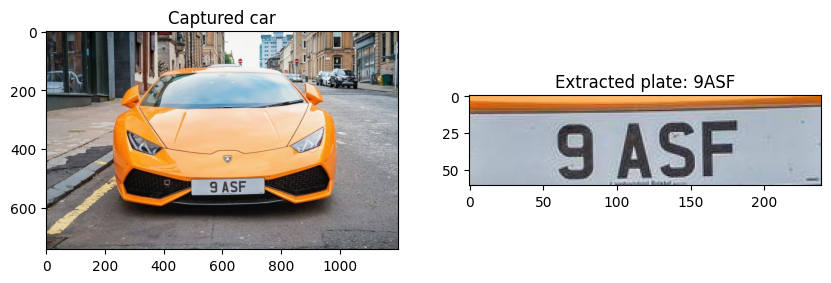

In [22]:
# Plot original and output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Captured car")

axes[1].imshow(numberplate)
axes[1].set_title(f"Extracted plate: {numberplate_string}")

plt.show()